# Introduccion

http://geopandas.org/install.html

In [25]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('ggplot')

In [76]:
def hacer_mapa(geo_DF, region, variable):
    '''
    Esta función crea un mapa para un geo_DF determinado
    '''
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.axis('off')
    ax.set_aspect('equal')
    geo_DF.plot(ax=ax, column=variable, cmap='inferno', scheme='quantiles')
    plt.title('Mapa {} {}'.format(region, variable))
    plt.savefig('Mapa_{}_{}.png'.format(region, variable), dpi = 100, bbox_inches="tight")

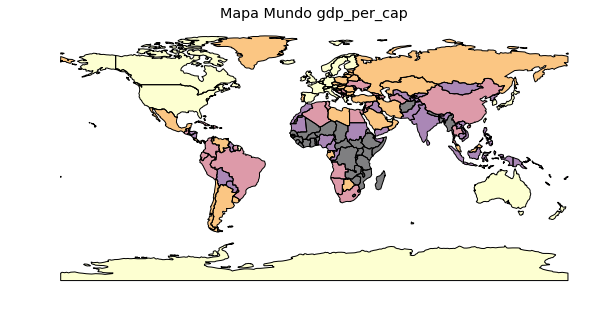

In [77]:
hacer_mapa(world, 'Mundo', 'gdp_per_cap')

In [27]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

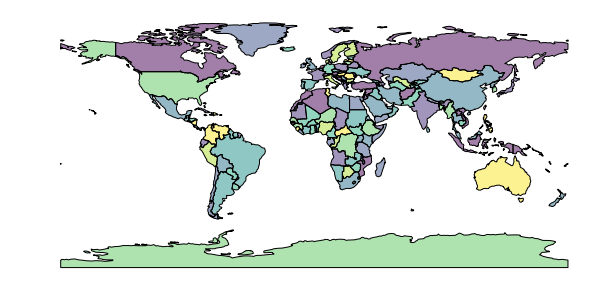

In [28]:
hacer_mapa(world)

In [29]:
world_sin_antartica = world[world.name != "Antarctica"]

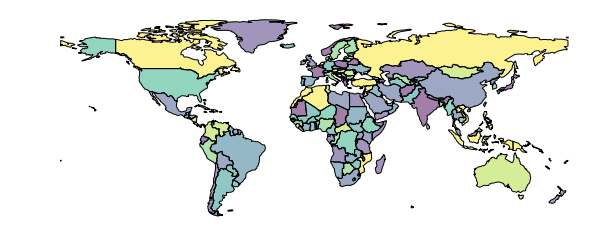

In [30]:
hacer_mapa(world_sin_antartica)

In [31]:
world_sin_eua = world_sin_antartica[world_sin_antartica.name != "United States"]

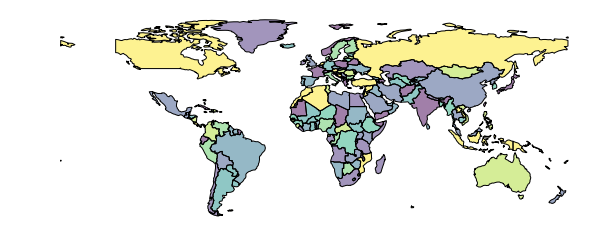

In [32]:
hacer_mapa(world_sin_eua)

In [33]:
africa = world[world.continent == "Africa"]

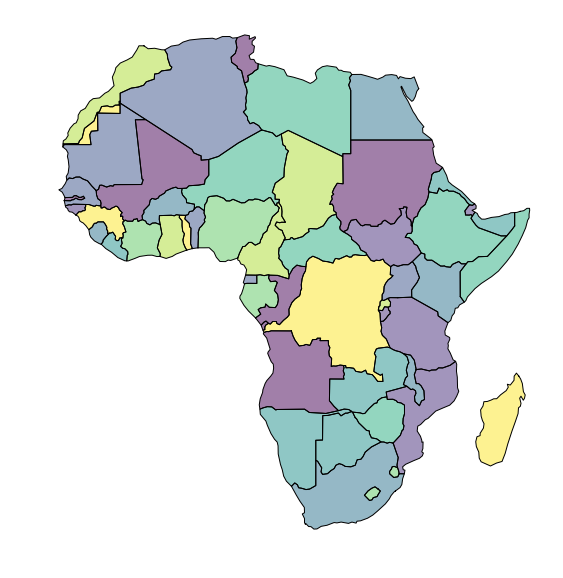

In [34]:
hacer_mapa(africa)

In [35]:
eua = world[world.name == "United States"]

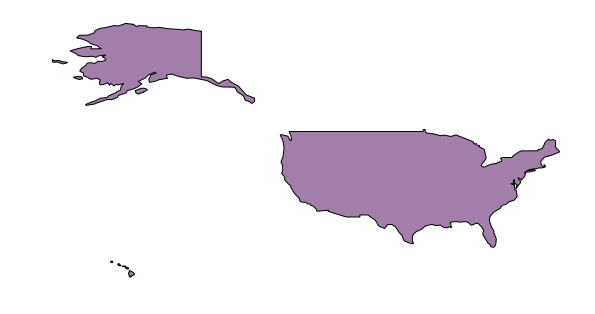

In [36]:
hacer_mapa(eua)

In [37]:
paises_fuera_mundial = ['Chile', 'United States', 'Netherlands']
paises_fuera_mundial_gdf = world[world['name'].isin(paises_fuera_mundial)]

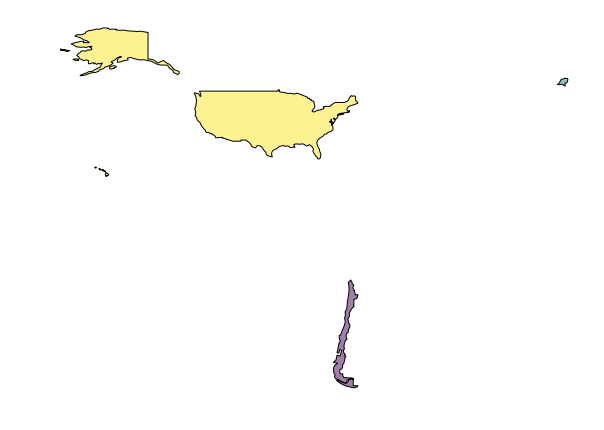

In [38]:
hacer_mapa(paises_fuera_mundial_gdf)

# Stan Countries

In [40]:
stan_countries = [pais for pais in world.name if 'stan' in pais[-4:]]

In [43]:
stan_countries_gdf = world[world['name'].isin(stan_countries)]

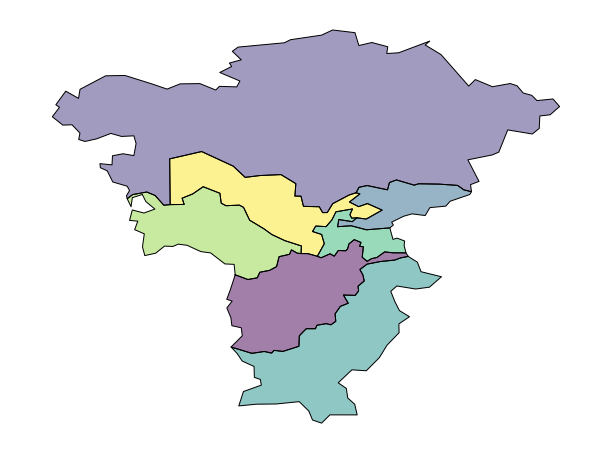

In [45]:
hacer_mapa(stan_countries_gdf)

In [49]:
world.head()

,continent,gdp_md_est,geometry,iso_a3,name,pop_est,gdp_per_cap
0,Asia,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,...",AFG,Afghanistan,28400000.0,0.000784
1,Africa,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...,AGO,Angola,12799293.0,0.008618
2,Europe,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,...",ALB,Albania,3639453.0,0.005993
3,Asia,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,...",ARE,United Arab Emirates,4798491.0,0.038408
4,South America,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...,ARG,Argentina,40913584.0,0.014027


In [48]:
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

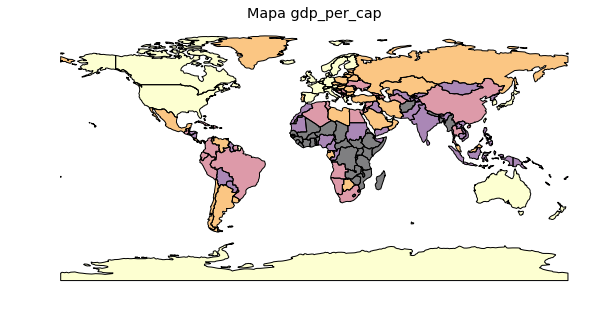

In [66]:
hacer_mapa(world, 'gdp_per_cap')

# Reporting

In [78]:
import datetime

In [81]:
NOW = datetime.datetime.now().isoformat()[0: 10]

In [82]:
import pptx
import pptx.util
from pptx import Presentation
from pptx.util import Cm

In [3]:
types_of_slides = {'Title': 0,
                   'Title and Content': 1,
                   'Section Header': 2,
                   'Two Content': 3,
                   'Comparison': 4,
                   'Title Only': 5,
                   'Blank': 6,
                   'Content with Caption': 7,
                   'Picture with Caption': 8}

In [84]:
prs = Presentation('report_template.pptx')
slide_layout = prs.slide_layouts[types_of_slides['Blank']]

In [85]:
region = 'Mundo'
variable = 'gdp_per_cap'

In [87]:
left = Cm(0)
top = Cm(0)
altura = Cm(17.8)
slide = prs.slides.add_slide(slide_layout)
slide.shapes.add_picture('Mapa_{}_{}.png'.format(region, variable), left, top, height=altura)
prs.save('reporte_{}_{}_{}.pptx'.format(NOW, region, variable))

C:\Users\Oficina1\Anaconda3\lib\site-packages\pysal\esda\mapclassify.py:702: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam


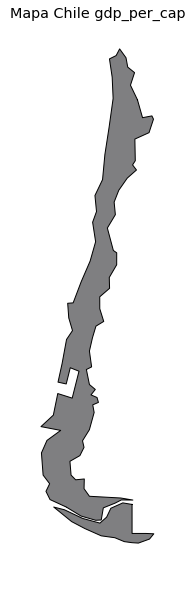

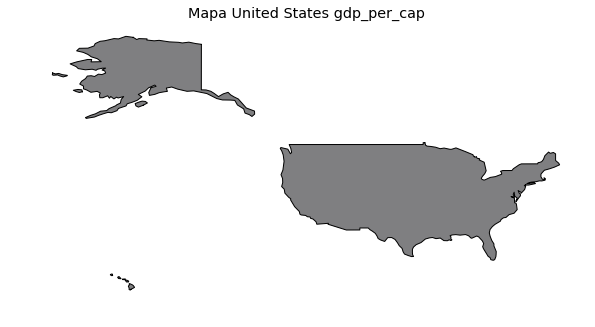

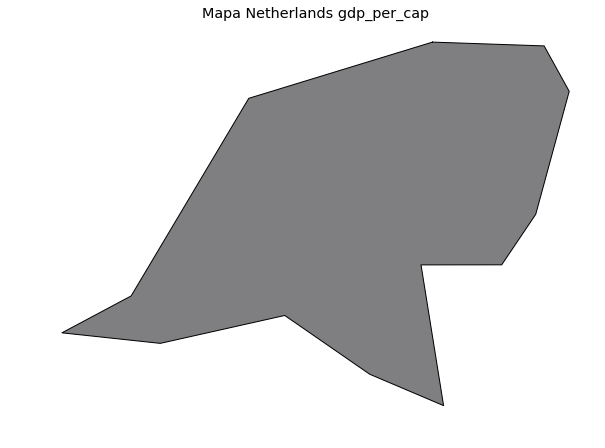

In [89]:
for pais in paises_fuera_mundial:
    pais_gdf = world[world.name == pais]
    hacer_mapa(pais_gdf, pais, 'gdp_per_cap')
    

In [ ]:
for pais in paises:
    left = Cm(4.23)
    top = Cm(2.71)
    altura = Cm(22.69)
    slide = prs.slides.add_slide(slide_layout)
    slide.shapes.add_picture('Mapa_{}.png'.format(pais), left, top, height=altura)
prs.save('reporte_{}.pptx'.format(NOW))